# Faces dataset

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Importando o dataset

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


## Processando os dados

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = faces.data
y = faces.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

# LDA

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Escolhendo o número de componentes

In [8]:
lda = LDA().fit(X, y)

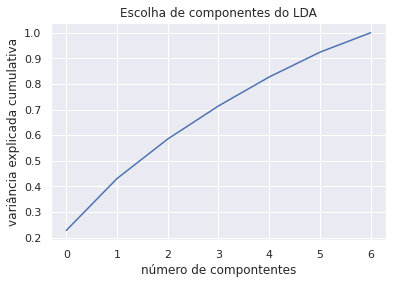

In [9]:
plt.plot(np.cumsum(lda.explained_variance_ratio_))

plt.title('Escolha de componentes do LDA')
plt.xlabel('número de compontentes')
plt.ylabel('variância explicada cumulativa')

plt.show()

## Executando LDA

In [10]:
lda = LDA(n_components=6)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

## Treinando classificadores

### SVM

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [12]:
svc = SVC()
model = make_pipeline(lda, svc)

In [13]:
X_train.shape

(1078, 6)

In [14]:
y_train.shape

(1078,)

In [15]:
param_grid = {
    'svc__C': [0.01, 0.5, 1, 5, 10, 50],
    'svc__kernel': ['poly', 'rbf', 'sigmoid'],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05],
    'svc__decision_function_shape':  ['ovo', 'ovr']
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 2min 9s, sys: 1.94 s, total: 2min 11s
Wall time: 21.9 s
{'svc__C': 0.5, 'svc__decision_function_shape': 'ovo', 'svc__gamma': 0.01, 'svc__kernel': 'sigmoid'}


In [16]:
model = grid.best_estimator_
y_fit = model.predict(X_test)

In [17]:
model

Pipeline(steps=[('lineardiscriminantanalysis',
                 LinearDiscriminantAnalysis(n_components=6)),
                ('svc',
                 SVC(C=0.5, decision_function_shape='ovo', gamma=0.01,
                     kernel='sigmoid'))])

#### Avaliando performance

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

##### Relatório de classificação

In [19]:
print(classification_report(y_test, y_fit))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.73      0.73      0.73        51
           2       0.58      0.72      0.64        25
           3       0.85      0.72      0.78        98
           4       0.69      0.86      0.77        21
           5       0.75      0.60      0.67        15
           6       0.48      1.00      0.65        10
           7       0.64      0.55      0.59        38

    accuracy                           0.71       270
   macro avg       0.66      0.72      0.68       270
weighted avg       0.73      0.71      0.71       270



##### Matriz de confusão

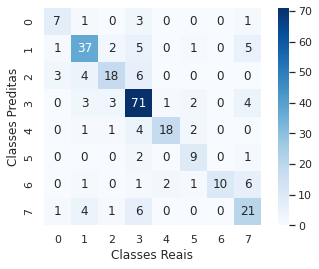

In [20]:
mat = confusion_matrix(y_test, y_fit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_fit),
            cmap=plt.cm.Blues)
plt.xlabel('Classes Reais')
plt.ylabel('Classes Preditas');

##### Acurácia

In [21]:
acc = accuracy_score(y_test, y_fit)

print(f'Acurácia de {round(acc, 2)*100}%')

Acurácia de 71.0%


### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
classifier = RandomForestClassifier(max_depth=2, random_state=42)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#### Avaliando performance

##### Relatório de classificação

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.42      0.50        12
           1       0.53      0.63      0.58        51
           2       0.67      0.40      0.50        25
           3       0.65      0.83      0.73        98
           4       0.63      0.57      0.60        21
           5       0.00      0.00      0.00        15
           6       0.80      0.40      0.53        10
           7       0.49      0.50      0.49        38

    accuracy                           0.60       270
   macro avg       0.55      0.47      0.49       270
weighted avg       0.57      0.60      0.58       270



/home/luis/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/luis/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/luis/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Matriz de confusão

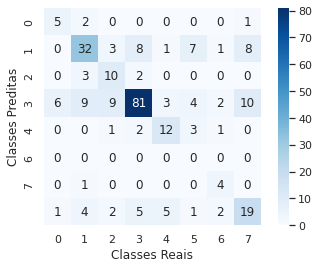

In [25]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_pred),
            cmap=plt.cm.Blues)
plt.xlabel('Classes Reais')
plt.ylabel('Classes Preditas');

##### Acurácia

In [26]:
acc = accuracy_score(y_test, y_pred)

print(f'Acurácia de {round(acc, 2)*100}%')

Acurácia de 60.0%


---

# PCA

In [27]:
from sklearn.decomposition import PCA

## Escolhendo o número de componentes

In [28]:
pca = PCA().fit(X, y)

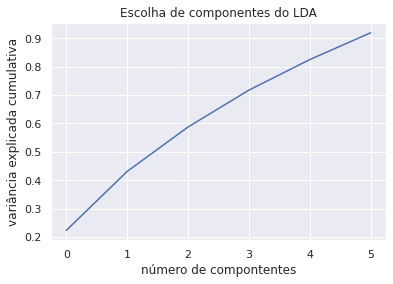

In [29]:
plt.plot(np.cumsum(lda.explained_variance_ratio_))

plt.title('Escolha de componentes do LDA')
plt.xlabel('número de compontentes')
plt.ylabel('variância explicada cumulativa')

plt.show()

## Executando PCA

In [30]:
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Treinando classificadores

### SVM

In [61]:
svc = SVC()
model = make_pipeline(pca, svc)

In [62]:
param_grid = {
    'svc__C': [0.01, 0.5, 1, 5, 10, 50],
    'svc__kernel': ['poly', 'rbf', 'sigmoid'],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05],
    'svc__decision_function_shape':  ['ovo', 'ovr']
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 1min 56s, sys: 1.74 s, total: 1min 58s
Wall time: 19.8 s
{'svc__C': 0.5, 'svc__decision_function_shape': 'ovo', 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [63]:
model = grid.best_estimator_
y_fit = model.predict(X_test)

In [64]:
model

Pipeline(steps=[('pca', PCA(n_components=5)),
                ('svc',
                 SVC(C=0.5, decision_function_shape='ovo', gamma=0.001))])

#### Avaliando performance

##### Relatório de classificação

In [65]:
print(classification_report(y_test, y_fit))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.70      0.76      0.73        51
           2       0.65      0.68      0.67        25
           3       0.78      0.78      0.78        98
           4       0.59      0.76      0.67        21
           5       0.88      0.47      0.61        15
           6       0.55      0.60      0.57        10
           7       0.54      0.50      0.52        38

    accuracy                           0.69       270
   macro avg       0.66      0.63      0.64       270
weighted avg       0.69      0.69      0.69       270



##### Matriz de confusão

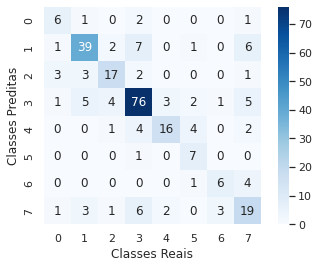

In [66]:
mat = confusion_matrix(y_test, y_fit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_fit),
            cmap=plt.cm.Blues)
plt.xlabel('Classes Reais')
plt.ylabel('Classes Preditas');

##### Acurácia

In [67]:
acc = accuracy_score(y_test, y_fit)

print(f'Acurácia de {round(acc, 2)*100}%')

Acurácia de 69.0%


### Random Forest

In [56]:
classifier = RandomForestClassifier(max_depth=2, random_state=42)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#### Avaliando performance

##### Relatório de classificação

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.42      0.48        12
           1       0.57      0.59      0.58        51
           2       0.58      0.28      0.38        25
           3       0.60      0.84      0.70        98
           4       0.79      0.52      0.63        21
           5       0.00      0.00      0.00        15
           6       1.00      0.10      0.18        10
           7       0.42      0.50      0.46        38

    accuracy                           0.57       270
   macro avg       0.56      0.41      0.43       270
weighted avg       0.56      0.57      0.54       270



/home/luis/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/luis/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/luis/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Matriz de confusão

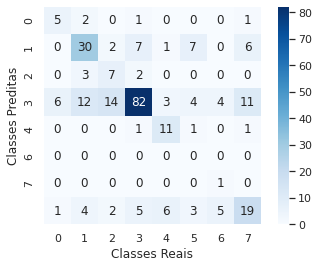

In [58]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_pred),
            cmap=plt.cm.Blues)
plt.xlabel('Classes Reais')
plt.ylabel('Classes Preditas');

##### Acurácia

In [59]:
acc = accuracy_score(y_test, y_pred)

print(f'Acurácia de {round(acc, 2)*100}%')

Acurácia de 56.99999999999999%
